<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/World_football_results_predicions_using_machine_learning/blob/master/Precy_Mae_Core_W6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Core W6 Independent Project**


---



## *1.* Defining the Question

**Overview**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches as showngiven the datasets that will be provided.


To work on this project, we will perform the following analysis with Python; 

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Expected flow for the assessment:
* Perform your EDA
* Perform any necessary feature engineering 
* Check of multicollinearity
* Start building the model
* Cross-validate the model
* Compute RMSE
* Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
2. Perform appropriate regressions on the data including your justification
3. Challenge your solution by providing insights on how you can make improvements.

**Dataset** 

* Variable Definitions: /content/fifa_ranking.csv
* Dataset: /content/results.csv

### a) Specifying the Question

>  Give a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).




### b) Defining the Metric for Success
 

> Getting an accurate solution to our hypothesis





### c) Understanding the context
> 

### d) Recording the Experimental Design

We took the following steps to get our hypothesis solution

>**1) Business Understanding**: This enabled us to understand the details as well as the context of our claim. In this case, the car sharing company wants to decifer some claims concerning the bluecar.


>**2) Reading the data:** This enables us to undrestand the data provided.


>**3) Checking our data:** This gives us information about our dataset including the shape, data types, columns, statistical summaries and other details about the dataset.


>**4) Data cleaning:** I enables us to come up with clean data that is easier to analyse. This involves reanming columns, checking and dealing with missing values and others .


>**5) EDA:** visualizing and understanding data.


>**6) Implementing the solution:** using hypothesis testing


>**7) Challenging the solution:**


>**8)Conclusion**















### e) Data Relevance
> The data is relevant as it contains operations of the autolib program by Bolloré Group enterprise for the year 2018.


## *2.* Reading the Data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Read rankings dataset
df_rankings= pd.read_csv("/content/fifa_ranking.csv",encoding='latin-1',error_bad_lines=False)
df_rankings.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [44]:
# Read the results dataset
df_results= pd.read_csv("/content/results.csv",encoding='latin-1',error_bad_lines=False)
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Checking the shape of the datasets**

In [6]:
# shape of ranks
df_rankings.shape

(57793, 16)

In [7]:
# shape of results
df_results.shape

(40839, 9)

In [8]:
# missing values
df_results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Our datasets are of different shapes, so we need to correct that before merging

**merging our datasets**

In [9]:
# Rename the column country full to enable us to merge
df_rankings.rename(columns={'country_full':'country'},inplace=True)

In [10]:
# displaying duplicated data on our results dataset
df_results.duplicated().sum()


0

Our results dataset has no duplicates

In [11]:
# displaying duplicated data on our rankings dataset
df_rankings.duplicated().sum()

37

Our rankings dataset has 37 duplicates which we need to drop because we do not expect something to be ranked twice.

In [12]:
# Dropping the duplicates
df_rankings.drop_duplicates(inplace=True)

In [13]:
# Merging our two datasets
df= pd.merge(df_rankings, df_results, on='country')
df.head(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False


## *3.* Check the data


In [14]:
# Determining the no. of records in our dataset
#
df.shape

(10240701, 24)

In [15]:
# A Preview of dataset columns
df.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral'],
      dtype='object')

In [16]:
# Previewing the top of our dataset
#
df.head(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False


In [17]:
# Previewing the bottom of our dataset
#
df.tail(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
10240698,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-11-16,Gibraltar,Armenia,2,6,UEFA Nations League,Gibraltar,False
10240699,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,False
10240700,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-26,Gibraltar,Estonia,0,1,Friendly,Gibraltar,False


In [18]:
# Taking a look at our statistical summaries
#
df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07,1.024070e+07
mean,6.913781e+01,1.723203e+02,4.596894e+02,-2.487730e-02,8.696770e+01,8.696770e+01,8.602791e+01,4.301402e+01,8.486915e+01,2.546078e+01,8.437956e+01,1.687593e+01,1.734412e+00,1.179132e+00
std,5.084940e+01,3.364306e+02,3.536158e+02,5.380187e+00,1.766095e+02,1.766095e+02,1.766132e+02,8.830662e+01,1.738576e+02,5.215731e+01,1.730509e+02,3.461018e+01,1.733334e+00,1.381380e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,0.000000e+00,1.400000e+02,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,6.100000e+01,0.000000e+00,4.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.050000e+02,1.948700e+02,6.600000e+02,1.000000e+00,8.279000e+01,8.279000e+01,8.179000e+01,4.090000e+01,7.841000e+01,2.352000e+01,7.845000e+01,1.569000e+01,2.000000e+00,2.000000e+00
max,2.090000e+02,1.775030e+03,1.920000e+03,9.200000e+01,1.158660e+03,1.158660e+03,1.169570e+03,5.847900e+02,1.159710e+03,3.479100e+02,1.200770e+03,2.401500e+02,3.100000e+01,2.100000e+01


## *4.* External Source Validation

>Our measurements are in line with what has been recorded. We got our external source validation and confirmed our dataset from Autolib Car sharing company.


## *5.* Tidying the Dataset


Tidying column names

In [19]:
# Data cleaning procedures, fixing column names to lower case
#
df.columns= df.columns.str.strip().str.lower().str.replace(' ','_')
df.head(2)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False


In [20]:
# Review column names to ensure proper naming
df.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral'],
      dtype='object')

In [21]:
# checking column data types
df.dtypes

rank                         int64
country                     object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
neutral                       bool
dtype: object

We will have to change the data types of objects to categorical

In [22]:
# Changing the column datatypes (object) of the data we'll be using into category
df['tounament'] = df.tournament.astype('category')
df['home_team'] = df.home_team.astype('category')
df['away_team'] = df.away_team.astype('category')
df.dtypes

rank                          int64
country                      object
country_abrv                 object
total_points                float64
previous_points               int64
rank_change                   int64
cur_year_avg                float64
cur_year_avg_weighted       float64
last_year_avg               float64
last_year_avg_weighted      float64
two_year_ago_avg            float64
two_year_ago_weighted       float64
three_year_ago_avg          float64
three_year_ago_weighted     float64
confederation                object
rank_date                    object
date                         object
home_team                  category
away_team                  category
home_score                    int64
away_score                    int64
tournament                   object
city                         object
neutral                        bool
tounament                  category
dtype: object

Dealing with missing values

In [23]:
# Identifying the Missing Data
df.isnull().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
tounament                  0
dtype: int64

We have no missing values

Checking for consistency and Uniformity

In [24]:
# Checking for unique values per column. To check for any anomalies
for column in df.columns:
  print('\n')
  print(df[column].nunique())
  print(df[column].unique())



209
[  1   5   4   3   2   6   9  11   8  12  14  10   7  13  16  19  17  18
  20  21  15  22  26  31  35  39  43  47  51  56  61  63  64  65  62  68
  69  70  81  73  76  77  82  83  60  54  53  50  49  48  52  55  57  58
  59  67  45  44  41  40  42  38  36  37  25  46  27  24  23  29  30  28
  32  33  34  66  84  86  87  88  85  71  74  75  72  78  79  80  92  90
  96 102  97  89  91  94  98  99 107 108 101 103  95 113 109 110 106 105
 100 104 111 112 116 115 114 117  93 118 122 124 129 119 126 120 131 127
 123 121 130 138 132 139 128 125 133 141 140 144 143 159 167 172 171 168
 165 166 173 174 181 186 188 189 176 160 147 158 169 156 134 137 135 136
 152 142 146 148 149 157 145 150 162 161 163 154 155 153 164 170 151 175
 178 184 183 179 185 180 177 187 182 190 191 192 193 194 196 195 197 198
 199 200 201 202 203 204 206 205 207 208 209]


196
['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'
 'Republic of Ireland' 'Russia' 'Brazil' 'Norway' 'Denmark' 'England'
 'France' 'Spai

From my observation, the tournament column has 104 possibilities

Creating a new column for wins, draws and losses.

In [25]:
# First create a new column that takes our scores so that we are able to figure if it's a win(>=1) or a loss (<0), draw(0)
df['score']= df['home_score']-df['away_score']

In [26]:
# Create a for loop to feed into a new column called results
outcome = [] 
# For each row in the column 
for score in df['score']:        
    if score >= 1:                   # if home score is greater than away score
        outcome.append('win') 
    elif score < 0:                  # if away score is greater than home score
        outcome.append("lose") 
    else: 
        outcome.append("draw") 
  
# Create a column from the list 
df['home_results'] = outcome 
df.head(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,tounament,score,home_results
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False,Friendly,1,win
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False,Friendly,-3,lose
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False,Friendly,-1,lose


The new column called home results contains information on whether the home team won, lost or got a draw.

In [27]:
# Creating an empty column for our new information on tounaments
df['game']=""
df.head(2)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,tounament,score,home_results,game
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False,Friendly,1,win,
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False,Friendly,-3,lose,


In [28]:
# I would also like to separate my competitions from my friendly tournaments
for g in df['tournament']:        
  def tounament (g):
    if g != 'Friendly':
      return 'competition'
    else :
      return 'friendly_match'

In [29]:
# Applying the formula we have provided above to our pandas dataframe
df['game'] = df.tournament.apply(lambda x: tounament(g))
df.head(4)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,tounament,score,home_results,game
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False,Friendly,1,win,friendly_match
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False,Friendly,-3,lose,friendly_match
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False,Friendly,-1,lose,friendly_match
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False,Friendly,4,win,friendly_match


In [30]:
# We are interested in data with one rank date
df['rank_date'].unique()

array(['1993-08-08', '1993-09-23', '1993-10-22', '1993-11-19',
       '1993-12-23', '1994-02-15', '1994-03-15', '1994-04-19',
       '1994-05-17', '1994-06-14', '1994-07-21', '1994-09-13',
       '1994-10-25', '1994-11-22', '1994-12-20', '1995-02-20',
       '1995-04-19', '1995-05-16', '1995-06-13', '1995-07-25',
       '1995-08-22', '1995-09-19', '1995-10-17', '1995-11-21',
       '1995-12-19', '1996-01-24', '1996-02-21', '1996-04-24',
       '1996-05-22', '1996-07-03', '1996-08-28', '1996-09-25',
       '1996-10-23', '1996-11-20', '1996-12-18', '1997-02-27',
       '1997-04-09', '1997-05-14', '1997-06-18', '1997-07-16',
       '1997-08-20', '1997-09-17', '1997-10-17', '1997-11-19',
       '1997-12-23', '1998-02-18', '1998-03-18', '1998-04-22',
       '1998-05-20', '1998-07-15', '1998-08-19', '1998-09-16',
       '1998-10-21', '1998-11-18', '1998-12-23', '1999-01-27',
       '1999-02-24', '1999-03-24', '1999-04-21', '1999-05-19',
       '1999-06-16', '1999-07-21', '1999-08-18', '1999-

In [32]:
#Checking the number of records per rank date
df['rank_date'].value_counts()

2017-09-14    35997
2018-02-15    35997
2016-11-24    35997
2017-04-06    35997
2018-01-18    35997
              ...  
1993-12-23    34360
1994-02-15    34360
1993-08-08    34249
1993-10-22    34249
1993-09-23    34249
Name: rank_date, Length: 286, dtype: int64

The rank date with the highest records which is fairly resent is 2018-01-18, so I will pick this rank date to work with. I have chosen to work with one rank date because one rank date will have only one country recorded per rank.

In [33]:
# Selecting only data for 2008
df1 =df.loc[df['rank_date'] == "2018-01-18"]
df1.head(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,tounament,score,home_results,game
162680,1,Germany,GER,1601.91,1602,0,863.86,863.86,752.68,376.34,478.66,143.6,1090.54,218.11,UEFA,2018-01-18,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False,Friendly,1,win,friendly_match
162681,1,Germany,GER,1601.91,1602,0,863.86,863.86,752.68,376.34,478.66,143.6,1090.54,218.11,UEFA,2018-01-18,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False,Friendly,-3,lose,friendly_match
162682,1,Germany,GER,1601.91,1602,0,863.86,863.86,752.68,376.34,478.66,143.6,1090.54,218.11,UEFA,2018-01-18,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False,Friendly,-1,lose,friendly_match


We have selected data for rank date 2018-01-18 So we are good to go.

In [34]:
# Picking columns relevant to our research we only neeeded information on rank,	home_team,	away_team,	game,	year,	home_score,	away_score and 	home_results
df2 = df1[['rank','home_team','away_team','game','home_score','away_score','home_results']]
df2.head(3)

,rank,home_team,away_team,game,home_score,away_score,home_results
162680,1,Germany,Switzerland,friendly_match,1,0,win
162681,1,Germany,Belgium,friendly_match,0,3,lose
162682,1,Germany,Netherlands,friendly_match,1,2,lose


As shown from our rank, we do not have different conflicting ranks which is good.

In [37]:
# I will also rename the column rank to home_rank
df2.rename(columns={'rank':'home_rank'},inplace=True)
df2.head()

,home_rank,home_team,away_team,game,home_score,away_score,home_results
162680,1,Germany,Switzerland,friendly_match,1,0,win
162681,1,Germany,Belgium,friendly_match,0,3,lose
162682,1,Germany,Netherlands,friendly_match,1,2,lose
162683,1,Germany,Switzerland,friendly_match,6,2,win
162684,1,Germany,Austria,friendly_match,1,2,lose


In [41]:
df2.duplicated().sum()

5607

In [ ]:
# Create an empty column called away rank
df3['away_rank']=""

In [38]:
df2.shape

(35997, 7)

Checking for outliers

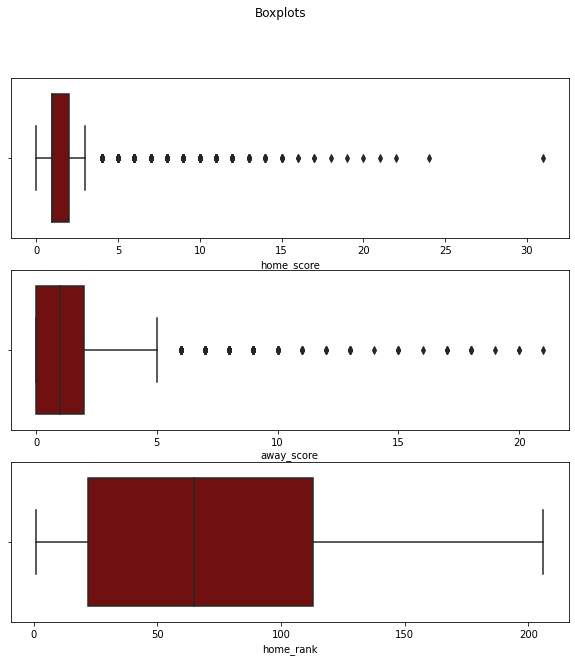

In [46]:
# Checking for outliers
fig, ((ax1),(ax2), (ax3)) = plt.subplots(3 ,figsize=(10, 10))
fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df2['home_score'], ax=ax1, color='maroon')
sns.boxplot(df2['away_score'], ax=ax2, color='maroon')
sns.boxplot(df2['home_rank'], ax=ax3, color='maroon')

plt.show()

There are scores that are way beyond 20 for home score and 30 for away score, which appears not to be normal to get such high scores. I will therefore remove the outliers.

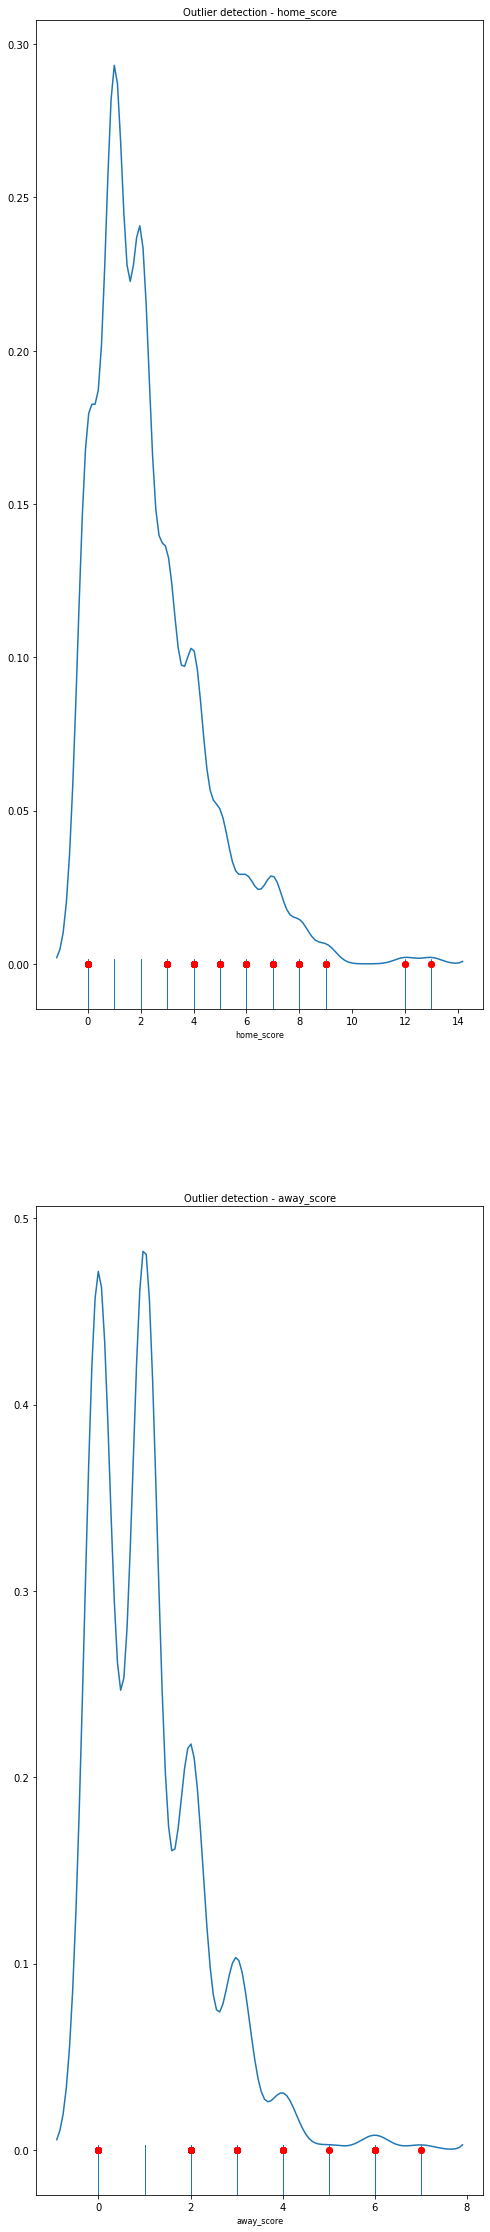

In [43]:
#  Removing outliers using percentile based outlier removal giving a threshold of 20
def percentile_based_outlier(df, threshold=20):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(df, [diff, 100 - diff])
    return (df < minval) | (df > maxval)

col_names = ['home_score','away_score']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df [col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()
# The values marked with a dot below in the x-axis of the graph have been removed from the column based on the set threshold percentile.

We have successfully removed our outliers

## *6.* Exploratory Analysis




### Univariate analysis

**Measures of central tendancy**

In [57]:
# Creating a list with my column names to make it easier to create a for loop
all_columns= list(df1.columns)
all_columns.remove('home_team')
all_columns.remove('away_team')
all_columns.remove('tournament')
all_columns.remove('home_results')
#
columns= list(df1.columns)
columns.remove('home_score')
columns.remove('away_score')
columns.remove('rank')                        

We have separated the numerical from the categorical columns to ease performing our Exploratory analysis.

In [58]:
# Getting the mean
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df[column].mean()))
  



rank:69.13781185487204


home_score:1.7344123219689747


away_score:1.1791319754380096


The averages(sum of total divide by number of entries) is 69.13 for rank and 1.73 for home score and 1.17 for away score.

In [59]:
#Getting the median
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df[column].median()))



rank:61.0


home_score:1.0


away_score:1.0


The center most character in rank is 61, home_score is 1 as well as away score.

In [60]:
# Getting the mode
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df[column].mode()))



rank:0    2
dtype: int64


home_score:0    1
dtype: int64


away_score:0    0
dtype: int64


* The most frequently occuring number in rank is rank number two. 
* While the most frequently occuring home score is 1 this could mean that most home players score a 1. 
* The most frequent away score is zero, meaning most visiting teams score a zero.

In [61]:
# Getting the standard deviation
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df[column].std()))



rank:50.84939531198202


home_score:1.7333341036958654


away_score:1.381379693058336


Standard deviation means a variance from the mean. From our values;
* The SD for rank is 50.89 which is a high SD. This means that there is a large difference in values from the mean value.
* The SD for home_score is 1.73 which is not too large nor too small. This means that most values surround the mean value
* The SD for away score is also not so high (1.38)

In [62]:
# Getting the range of each numerical column
#
def calculating_range(column):
  maximum= df[column].max()
  minimum=df[column].min()
  column_range= maximum-minimum
  return column_range

for column in all_columns:
  print('\n')
  print(column+ ':'+ str(calculating_range(column)))



rank:208


home_score:31


away_score:21


Range means distance between the highest and the lowest variable. For our variables;
* Rank is 208, the data is largely distributed.
* Home score is 31, the data is fairly distributed.
* Away score is 21, the data is fairly distributed.

In [63]:
# Interquartile range
for column in all_columns:
  print('\n')
  print(df[column].quantile([0.25,0.5,0.75]))



0.25     25.0
0.50     61.0
0.75    105.0
Name: rank, dtype: float64


0.25    1.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64


0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


* The first quartile(0.25); is the median of the lower half of the data set this means that about 25% of the numbers in the data set lie below (25-rank), (1-home score) and (0-away score)
* Second quartile(0.50) ; the middle part of the dataset. 
* Third quartile (0.75);is the median of the upper half of the data set.
ranges are listed above this means that aout 25% of the numbers lie above (105-rank), (2-home score) and (2-away score)

In [64]:
# Getting the Skewness and Kurtosis
for column in all_columns:
  print('\n')
  print(column+ ', Skewness: '+str(df[column].skew()))
  print(column+ ', Kurtosis: '+str(df[column].kurt()))



rank, Skewness: 0.5534948366922966
rank, Kurtosis: -0.6440316117271565


home_score, Skewness: 2.0998132130286375
home_score, Kurtosis: 10.175852373888224


away_score, Skewness: 2.4450273843467487
away_score, Kurtosis: 14.138043113077712


*Skewness is a measure of a dataset’s symmetry.A perfectly symmetrical data set will have a skewness of 0.* From our dataset, 

* Rank seems to almost have a symetrical as it is closest to zero (0.55) but both home score and away score are positively skewed, meaning most numbers lie to the right of the x axis.

*“The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution.”- Dr Wheeler*.  From our dataset;

* Rank has a kurtosis closer to zero, meaning it's tail is fairly distributed to the rest of the dataset.
Home score and away score both have  positive Kursosis meaning they have a larger tail compared to the rest of the dataset.

We will visualize this using the histograms below.





**Histograms**

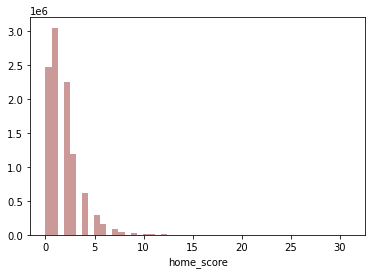

In [52]:
# Plotting a histogram for away score
sns.distplot(df1['home_score'], kde = False, color = 'maroon')

As shown above, the histogram of home score shows that the values are more to the right of the x axis  and there are many numbers as well on the bottom part causing a peak.

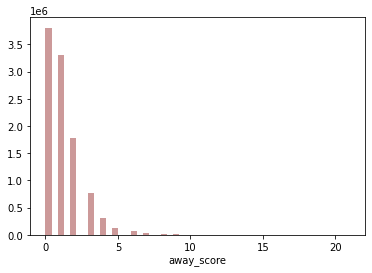

In [51]:
# Plotting a histogram for away score
sns.distplot(df1['away_score'], kde = False, color = 'maroon')
# The histogram shows that our data is skewed to the right implying that most data falls to the right, or positive side, of the graph's peak. and highly peaked.

As shown above, the histogram of away score shows that the values are more to the right of the x axis and there are many numbers as well on the bottom part causing a peak

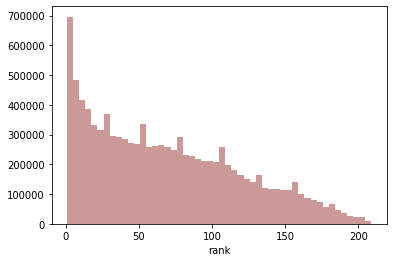

In [65]:
# Plotting a histogram for rank
sns.distplot(df1['rank'], kde = False, color = 'maroon')

The histogram above shows that our rank data is fairly distributed and it seams thet the highly ranked (top ten)teams participated more than the lowly ranked(200's)

**Distribution plot**

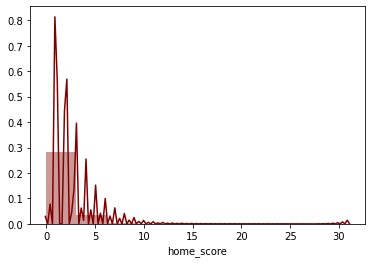

In [67]:
# A plot showing both a line and histogram graph for home score
sns.distplot(df['home_score'],color='maroon', bins=10)

The distribution between scores is very low.

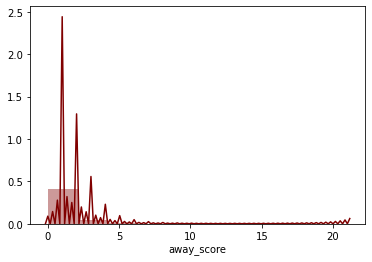

In [69]:
# A plot showing both a line and histogram graph for away score
sns.distplot(df['away_score'],color='maroon',bins=10)

The distribution between scores is very low.

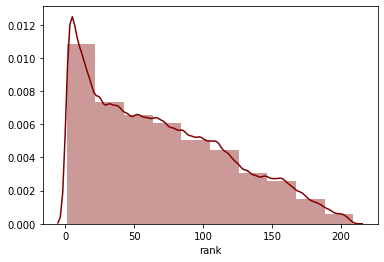

In [70]:
# A plot showing both a line and histogram graph for rank
sns.distplot(df['rank'],color='maroon',bins=10)

**Bar graphs**

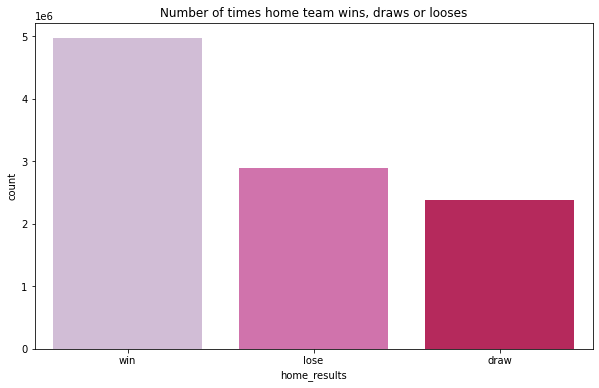

In [90]:
# Getting the frequency of the bluecars both in the weekend and weekday
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df1['home_results'], palette='PuRd' )
plt.title('Number of times home team wins, draws or looses')
plt.show()


Wins have the highest count followed by losses then draws. This could mean that If a home team plays it wins more times than it loses or draws.

In [79]:
df1.head(3)

,rank,home_team,away_team,tournament,home_score,away_score,home_results
0,1,Germany,Switzerland,Friendly,1,0,win
1,1,Germany,Belgium,Friendly,0,3,lose
2,1,Germany,Netherlands,Friendly,1,2,lose


### Bivariate analysis

In [ ]:
# Showing correlation using a correlation table
df1.corr()
# There is a perfectly positive correlation between bluecars taken and blue cars returned of 0.99

# There is a moderate negative correlation beteween postal code and blue cars taken of -0.698 and also a moderate negative correlation 
# between blue cars returned and postal code of -0.6975


,postal_code,bluecars_taken_sum,bluecars_returned_sum
postal_code,1.000000,-0.69802,-0.697519
bluecars_taken_sum,-0.698020,1.00000,0.998660
bluecars_returned_sum,-0.697519,0.99866,1.000000


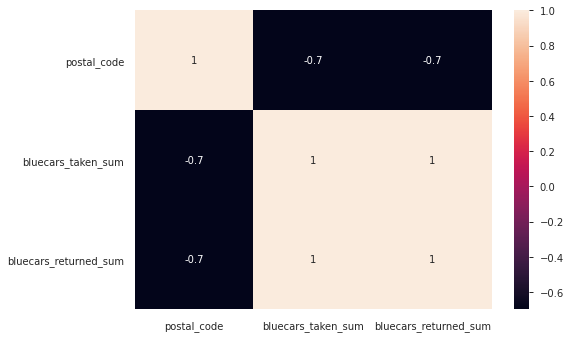

In [ ]:
# Showing correlation using a heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

* There is a perfectly positive relationship between bluecars taken and bluecars returned with a correlation of 1

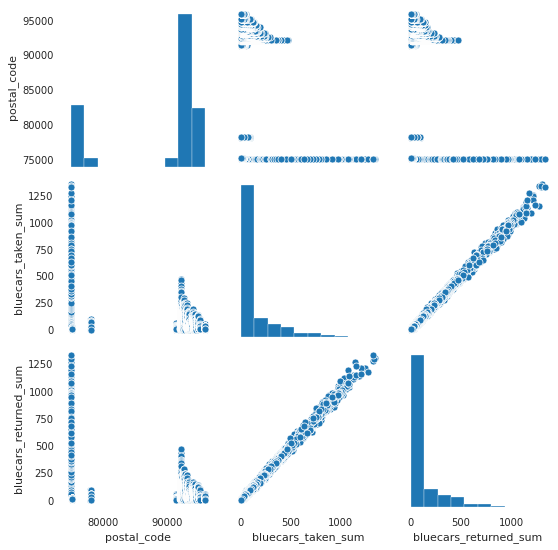

In [ ]:
# Bivariate using a pair plot
sns.pairplot(df1)
# As shown below, the correlation between the blue cars returened and blue cars taken is positive as the line graphs ascend from left to right. 
# Postal code seem to have a sepereted graph due to the nature of postal code allocation.

## **Hypothesis**

* **Null-Hypothesis** : There is no difference between the number of Bluecars taken on Weekdays from postal code 75011 and postal code 75015.

* **Alternative-Hypothesis** : There is a difference between the number of blue cars taken on weekdays from postal code 75011 ad postal 75015.

* **Significance level** : a= 0.025 due to it's two tailed nature.

* **P-value** : Calculated as 0.05

In [ ]:
# selecting a random sample
df1_sample= df1.sample(n= 1000,replace=False)
df1_sample

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
1453,75010,weekday,222,246
7761,92320,weekday,44,46
2986,75020,weekday,389,417
13605,94130,weekday,25,24
11102,93260,weekday,44,38
...,...,...,...,...
9283,92420,weekday,8,11
286,75002,weekday,160,162
3440,78000,weekday,31,35
7522,92310,weekday,37,32


> **Reason for sampling technique** 
>*  Simple random sampling is a better sampling technique because it gives equal chance to all the data to be a part of our sample. We do not have categorical data to compare so stratified sampling will not be suitable.

>**Reason for sampling size**
> * We use a sample size of a thousand because it is almost 10% of our population dataset which will accurately represent my total population. 

In [ ]:
# Select from our sample data with postal code 75015
sample_75015 =df1_sample.loc[df1_sample['postal_code'] == 75015]
sample_75015

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
2289,75015,weekday,712,736
2278,75015,weekend,1082,1189
2208,75015,weekday,871,838
2254,75015,weekday,818,770
2304,75015,weekday,944,891
2191,75015,weekday,694,728
2225,75015,weekend,1036,1066
2220,75015,weekday,781,793
2291,75015,weekend,1023,1017
2286,75015,weekday,737,775


In [ ]:
# A view of the statistic qualities of our sample
df1_sample.describe()

,postal_code,bluecars_taken_sum,bluecars_returned_sum
count,1000.000000,1000.000000,1000.00000
mean,88870.864000,125.225000,125.39000
std,7603.595842,183.793559,184.85303
min,75001.000000,0.000000,0.00000
25%,91370.000000,21.000000,20.00000
50%,92350.000000,47.000000,45.00000
75%,93400.000000,128.500000,129.25000
max,95880.000000,1088.000000,1189.00000


In [ ]:
# we select we specify our data to weekdays
interested_sample=sample_75015[sample_75015['day_type'].str.contains("weekday")]
interested_sample

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
2289,75015,weekday,712,736
2208,75015,weekday,871,838
2254,75015,weekday,818,770
2304,75015,weekday,944,891
2191,75015,weekday,694,728
2220,75015,weekday,781,793
2286,75015,weekday,737,775
2338,75015,weekday,669,698


In [ ]:
bluecar_taken_list = interested_sample['bluecars_taken_sum'].tolist()
bluecar_taken_list

[712, 871, 818, 944, 694, 781, 737, 669]

In [ ]:
# Getting scipy for our t statistic
from scipy.stats import ttest_1samp

In [ ]:
# population average
pop_av= 126
# sample av
sample_av=125
# sample size
n = 1000

# standard deviation of population
std_sample = 182
# finish t- calculation
t= (sample_av-pop_av)/(std_sample/n**(1/2))
# t-statistic
t

-0.17375151978947137

In [ ]:
# degrees of freedom
df = n - 1

from scipy import stats
# calculate the critical value
# alpha is our confidence level
alpha = 0.025

# ppf is percent point function
t_critical_value = round(stats.t.ppf(q=alpha, df=df), 5)
t_critical_value

-1.96234

In [ ]:
from scipy.stats import norm
# calculate the p-value
p = stats.norm.cdf(t_critical_value)
p

0.02486145658322001

In [ ]:
if p<= 0.05:
  print("we reject null hypothesis")
else:
  print("We do not reject null hypothesis") 

we reject null hypothesis


**Conclusion**

* We will reject the null hypothesis and favour of the alternative hypothesis.
* The difference between the number of blue cars taken on
weekdays from area code 75011 and area 75015 is statistically significant with a p-value of 0.05 and below my alpha of 0.025.
* Therefore, we conclude that our study supports the alternative hypothesis that there is a difference 
between the number of blue cars taken on weekdays from area code 75011 and area 75015.

## *9.*Follow up Questions

### a). Did we have the right data?

> Our data was right and complete we had the variables needed to explain the hypothesis for the year 2018



### b). Do we need other data to answer our question?

> Extra data would have been useful especially data on other years before 2018 because other external factors could have influenced our hypothesis result such as economic state of the people of Paris.

###c). Did we have the right question?

> The research question is right and answerable statistically

In [ ]:
df_results['tournament']=np.where(df_results['tournament']==1,'friendly','championship')

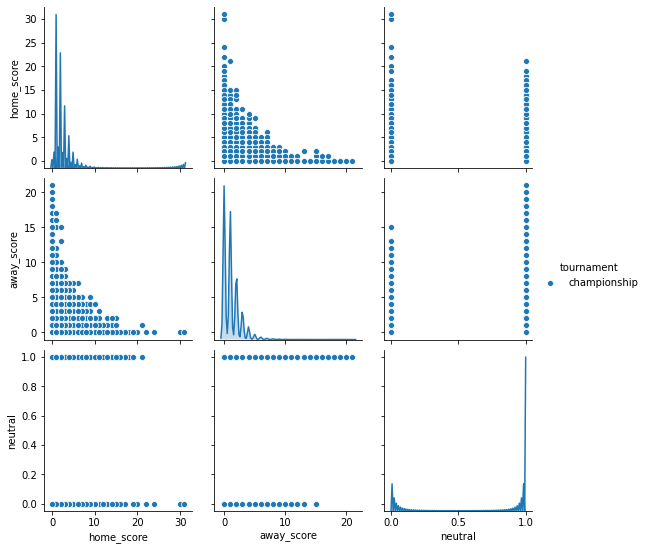

In [ ]:
sns.pairplot(df_results, hue='tournament')